In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DL SK 21 3 23/Codes and Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
num_cols = ["age","bmi","children","charges"]
cat_cols = ["sex","smoker","region"]

In [7]:
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584,1
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689,1
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675,0
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843,0
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802,1


In [8]:
df_cat = pd.get_dummies(df[cat_cols])
df_cat.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [9]:
df_final = pd.concat([df, df_cat], axis=1)
df_final.drop(cat_cols, axis=1, inplace=True)
df_final.head()

,age,bmi,children,charges,insuranceclaim,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,-0.953689,1,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,-0.728675,0,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0.719843,0,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,-0.776802,1,0,1,1,0,0,1,0,0


In [10]:
# feature and target
X = df_final.drop("insuranceclaim", axis=1)
y = df_final["insuranceclaim"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
X_train.shape

(936, 12)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [21]:
model = Sequential()
model.add(Dense(128, input_dim=12, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [22]:
sgd = SGD(learning_rate=0.03, momentum=0.9)
adam = Adam(learning_rate=0.001, ema_momentum=0.99)

In [23]:
model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["Accuracy"])
result = model.fit(X_train,y_train, epochs=10, batch_size=16)

Epoch 1/10
59/59 [==============================] - 1s 3ms/step - loss: 0.5198 - Accuracy: 0.7372
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 0.3570 - Accuracy: 0.8558
Epoch 3/10
59/59 [==============================] - 0s 3ms/step - loss: 0.3325 - Accuracy: 0.8643
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2993 - Accuracy: 0.8803
Epoch 5/10
59/59 [==============================] - 0s 3ms/step - loss: 0.3004 - Accuracy: 0.8739
Epoch 6/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2790 - Accuracy: 0.8803
Epoch 7/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2750 - Accuracy: 0.8835
Epoch 8/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2590 - Accuracy: 0.9028
Epoch 9/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2524 - Accuracy: 0.8953
Epoch 10/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2470 - Accuracy: 0.8996


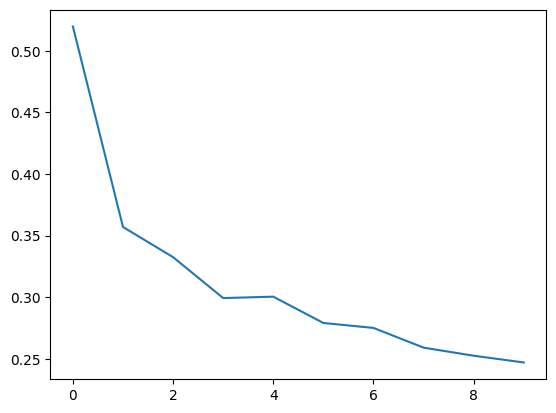

In [24]:
loss = result.history['loss']
accuracy = result.history['Accuracy']

plt.plot(loss)
plt.show()

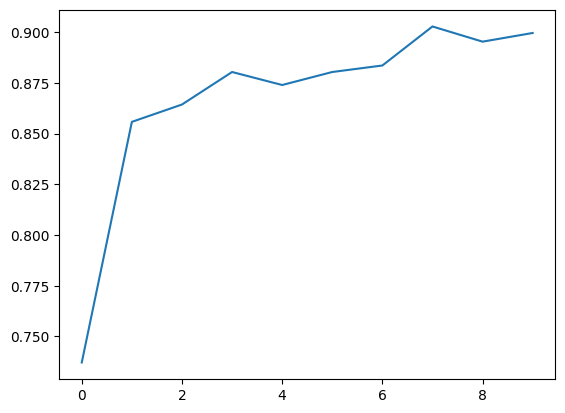

In [25]:
plt.plot(accuracy)
plt.show()

In [26]:
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [27]:
y_pred = np.where(y_pred >= 0.5,1,0)


In [28]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.2415 - Accuracy: 0.8980


[0.24146661162376404, 0.8980099558830261]

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       157
           1       0.97      0.86      0.91       245

    accuracy                           0.90       402
   macro avg       0.89      0.91      0.90       402
weighted avg       0.91      0.90      0.90       402

